<a href="https://colab.research.google.com/github/I-m-Sp/Credit_card_fraud_detection/blob/main/Credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

In [ ]:
import os
os.chdir('/content/drive/My Drive/credit card')

In [ ]:
import pandas as pd
file_path1 = '/content/drive/My Drive/credit card/fraudTrain.csv'
file_path2 = '/content/drive/My Drive/credit card/fraudTest.csv'
df_train = pd.read_csv(file_path1)
df_test = pd.read_csv(file_path2)

In [ ]:
df_train.shape

(1296675, 23)

In [ ]:
df_test.shape

(555719, 23)

In [ ]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df_train['cc_num'].nunique()

983

In [ ]:
df_train['category'].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [ ]:
df_fk=df_train[df_train['is_fraud']==1]

In [ ]:
df_fk.shape

(7506, 23)

In [ ]:
df_fk['merchant'].nunique()

679

In [ ]:
df_train[(df_train['first']=="Stephanie") & (df_train['last']=="Gill") & (df_train['is_fraud']==1)]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


In [ ]:
#category, amt, merchant, gender, merchant lattitude, merchant longitude, unix_time

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

([<matplotlib.patches.Wedge at 0x7d121b8458a0>,
 [Text(-0.16336434720038637, 1.0878014938690752, 'F'),
  Text(0.16336444904771144, -1.0878014785737964, 'M')],
 [Text(-0.08910782574566528, 0.5933462693831318, '54.7%'),
  Text(0.08910788129875168, -0.5933462610402526, '45.3%')])

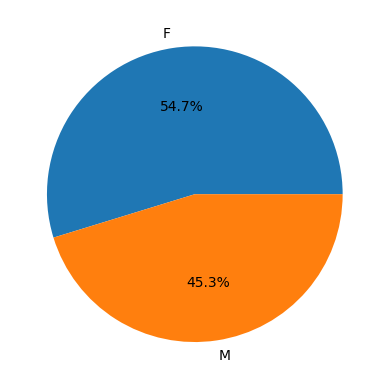

In [ ]:
plt.pie(df_train['gender'].value_counts(), labels=['F','M'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7d121b8684f0>,
 [Text(0.8200420146201701, 0.7331651207318122, 'misc_net'),
  Text(-0.6258326770170665, 0.9046178532273462, 'grocery_pos'),
  Text(-1.0900870735651813, -0.14734372075558275, 'entertainment'),
  Text(-0.7091802707768389, -0.8408705866784077, 'gas_transport'),
  Text(-0.09793509449847913, -1.0956316521831477, 'misc_pos'),
  Text(0.2977978440058632, -1.0589223031485642, 'grocery_net'),
  Text(0.506800054060597, -0.9762959106767662, 'shopping_net'),
  Text(0.6885606575818866, -0.8578369430319495, 'shopping_pos'),
  Text(0.8378949752220237, -0.712693489866215, 'food_dining'),
  Text(0.9491561735427618, -0.5559699256485577, 'personal_care'),
  Text(1.0199711906166637, -0.41189655292564104, 'health_fitness'),
  Text(1.0617399229439197, -0.28759057012885497, 'travel'),
  Text(1.0871888967829335, -0.16739266026892669, 'kids_pets'),
  Text(1.0987037856278685, -0.05338531115382751, 'home')],
 [Text(0.44729564433827457, 0.3999082476718975, '23.2%'),


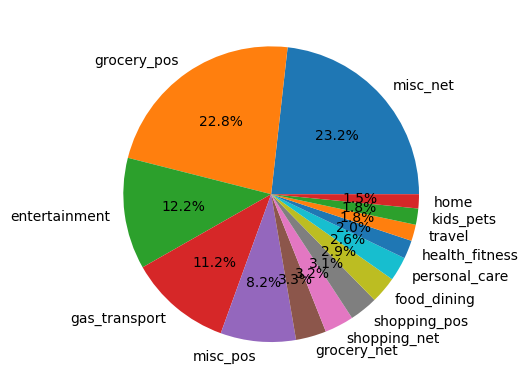

In [ ]:
plt.pie(df_fk['category'].value_counts(), labels=df_train['category'].unique(), autopct='%1.1f%%')

In [ ]:
df_test['category'].isnull().value_counts()

category
False    555719
Name: count, dtype: int64

In [ ]:
l=list(df_train['cc_num'].unique())

In [ ]:
rejected=l[0:500]

In [ ]:
df_train1=df_train[~df_train['cc_num'].isin(rejected)]

In [ ]:
df_test1=df_test[~df_test['cc_num'].isin(rejected)]

In [ ]:
x_train=df_train1[['category', 'amt', 'merchant', 'gender', 'merch_lat', 'merch_long', 'unix_time']]
y_train=df_train1['is_fraud']

In [ ]:
x_test=df_test1[['category', 'amt', 'merchant', 'gender', 'merch_lat', 'merch_long', 'unix_time']]
y_test=df_test1['is_fraud']

In [ ]:
x_train.shape

(496262, 7)

In [ ]:
x_test.shape

(212783, 7)

In [ ]:
x_train['amt'].value_counts()

amt
1.02      225
1.04      221
1.25      212
1.08      209
1.14      208
         ... 
243.80      1
202.22      1
928.93      1
359.25      1
754.81      1
Name: count, Length: 37130, dtype: int64

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ct1=ColumnTransformer(transformers=[
    ('tnsf1', OneHotEncoder(sparse_output=False, drop='first'),['category','merchant','gender'])
], remainder='passthrough')
x_train_transformed=ct1.fit_transform(x_train)
x_test_transformed=ct1.transform(x_test)

In [ ]:
columns_name=ct1.get_feature_names_out()

In [ ]:
x_train_df=pd.DataFrame(x_train_transformed, columns=columns_name)
x_test_df=pd.DataFrame(x_test_transformed, columns=columns_name)

In [ ]:
x_train_df.iloc[:,[13]]

,tnsf1__merchant_fraud_Abbott-Steuber
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
496257,0.0
496258,0.0
496259,0.0
496260,0.0


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
ct2=ColumnTransformer(transformers=[
    ('tnsf2', PCA(n_components=3),slice(0,13)),
    ('tnsf3', PCA(n_components=13),slice(13,705))
], remainder='passthrough')
x_train_new=ct2.fit_transform(x_train_df)
x_test_new=ct2.transform(x_test_df)

In [ ]:
columns_name2=ct2.get_feature_names_out()

In [ ]:
x_train_df_new=pd.DataFrame(x_train_new, columns=columns_name2)
x_test_df_new=pd.DataFrame(x_test_new, columns=columns_name2)

In [ ]:
x_train_df_new

,tnsf2__pca0,tnsf2__pca1,tnsf2__pca2,tnsf3__pca0,tnsf3__pca1,tnsf3__pca2,tnsf3__pca3,tnsf3__pca4,tnsf3__pca5,tnsf3__pca6,...,tnsf3__pca8,tnsf3__pca9,tnsf3__pca10,tnsf3__pca11,tnsf3__pca12,remainder__tnsf1__gender_M,remainder__remainder__amt,remainder__remainder__merch_lat,remainder__remainder__merch_long,remainder__remainder__unix_time
0,0.902515,0.014857,-0.132552,-0.005258,0.006045,0.006136,-0.015584,0.027696,0.000111,0.128414,...,-0.102167,0.122325,-0.017238,-0.155571,0.050358,0.0,44.69,36.782047,-87.094603,1.325413e+09
1,0.902515,0.014857,-0.132552,0.001193,-0.000475,-0.009958,-0.026890,-0.055548,0.048262,-0.015428,...,0.153933,-0.013071,-0.090299,0.150610,0.092521,0.0,72.19,32.470614,-100.459639,1.325413e+09
2,-0.278158,0.721286,-0.439202,-0.009332,0.012856,-0.006017,-0.018703,0.043511,-0.034850,0.038809,...,-0.028634,-0.012945,0.151948,0.095602,-0.005960,0.0,198.66,40.171215,-73.905119,1.325413e+09
3,-0.278158,0.721286,-0.439202,-0.008829,0.004681,-0.004749,0.017812,-0.007345,-0.006224,-0.021662,...,-0.005107,-0.049589,0.086501,-0.038247,-0.052999,0.0,185.82,28.512323,-82.448946,1.325413e+09
4,0.902515,0.014857,-0.132552,-0.001336,0.006700,0.023740,-0.008605,0.007491,0.038278,0.034352,...,-0.011393,-0.053811,-0.072032,0.037416,0.070931,0.0,68.35,41.893432,-95.736718,1.325413e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496257,-0.263360,-0.691993,-0.487658,-0.001806,-0.018290,0.003686,0.017879,0.007829,0.012626,-0.025421,...,-0.079426,-0.003910,0.018159,0.014411,-0.088828,1.0,77.83,40.372477,-79.115942,1.371816e+09
496258,-0.041460,-0.003493,0.048286,-0.003545,-0.003984,-0.003512,-0.001195,0.000519,-0.001880,0.008216,...,0.008957,0.003146,0.002938,-0.011203,0.001802,0.0,157.69,37.918700,-80.800598,1.371816e+09
496259,-0.263360,-0.691993,-0.487658,0.000087,-0.013343,-0.025464,0.009283,-0.017525,0.010420,0.011078,...,-0.023233,-0.011188,0.026694,-0.024866,0.013278,0.0,84.10,39.193343,-91.016642,1.371817e+09
496260,-0.018220,-0.001394,0.018127,-0.002098,-0.000855,-0.001832,-0.001872,-0.000492,-0.001457,0.000491,...,-0.000283,0.000019,0.000285,-0.000450,-0.000414,1.0,19.71,27.465871,-81.511804,1.371817e+09


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
base_models=[
    ('lr',LogisticRegression(random_state=42)),
    ('dt',DecisionTreeClassifier(random_state=42)),
    ('rd',RandomForestClassifier(n_estimators=100,random_state=42))
]
meta_learner=LogisticRegression(random_state=42)
stk=StackingClassifier(estimators=base_models, final_estimator=meta_learner)
stk.fit(x_train_df_new,y_train)

StackingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('rd', RandomForestClassifier(random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

In [ ]:
y_pred=stk.predict(x_test_df_new)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9949667031670764